# Exemplo de reamostragem das partículas

In [7]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import random
import inspercles
from pf import Particle, draw_random_sample


import cv2

import sys
import os
os.getcwd() 
import sys
sys.path.append(os.getcwd())


#import inspercles

import importlib



#importlib.reload(inspercles)


# Para suprimir alguns warnings do Matplotlib Inline
import warnings
warnings.simplefilter('ignore')
%matplotlib inline



Using scikit-learn to compute nearest neighbors


## Diretõrio de trabalho

In [8]:
!pwd




/home/pedro/Desktop/INSPER/Robotica/Robotica-Entregas/particle


In [9]:


from PIL import Image as PilImage


color_image = cv2.imread("sparse_obstacles.png")
pil_image = color_image
np_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


#color_image = PilImage.open("sparse_obstacles.png", 'r')
#pil_image = color_image.convert('1') # Converte a imagem PIL para Grayscale
#np_image = np.asarray(pil_image)

particle_size = 10

#import matplotlib_render as plotmap


back_color = "black"
colors     = ['red', 'green', 'cyan', 'yellow']
width, height = 775, 746





initial_pose = [200, 200, math.pi/8] # Posicao inicial considerada para o pf
inspercles.initial_pose = initial_pose
pose = [330, 220, math.radians(90)] # posicao "verdadeira" do robo 
inspercles.pose = pose
robot_radius=10   # Raio do robo
inspercles.robot_radius = robot_radius


# Os angulos em que o robo simulado vai ter sensores
angles = np.linspace(0.0, 2*math.pi, num=8)

particle_cloud = []



    
    
    
    

## Mapa com posição inicial

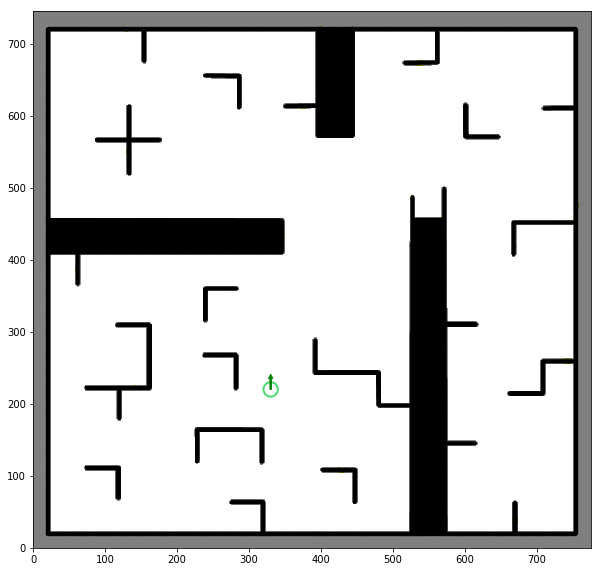

In [10]:
inspercles.nb_draw_map(color_image, pose=pose, robot=True)

A função *nb_initialize_particle_cloud()* pertence ao módulo <code>inspercles</code> e já faz uma primeira aleatorização das partículas

In [11]:
particulas = inspercles.nb_create_particles(pose = initial_pose, var_x = 100, var_y = 100, var_theta = math.pi/2, num = 10)


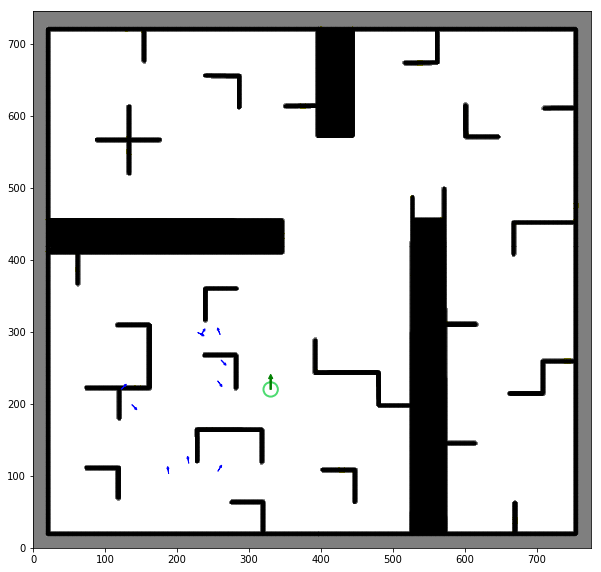

In [12]:
inspercles.nb_draw_map(color_image, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)

Vamos tornar a distribuição das partículas desequilibrada para observarmos a reamostragem

In [13]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [14]:
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]
particulas_pesos = [p.w for p in particulas]

In [15]:
particulas_exp

[[122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [256.65506285774626, 106.23787407544181, 1.0185201962935335],
 [228.69184603377136, 299.04851161112003, -0.48229495745250606],
 [261.1235308234529, 260.76731582768963, -0.8036891548299908],
 [259.7696774419905, 296.0853405695777, 1.935366280805058],
 [256.37587246851547, 231.7896178484614, -0.9192425521316945],
 [188.28821854796644, 103.01785011165181, 1.7130250331802257],
 [216.21354201520876, 117.28133310361137, 1.7324831479657705],
 [233.39536989759162, 295.7708718108544, 0.9980193575222707],
 [137.14125988038944, 198.87912618426066, -0.7950111983542425]]

Vejam como está a distribuição dos pesos

In [16]:
particulas_pesos

[0.8,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223]

Vamos criar novas partículas reamostrando

In [18]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso perdeu o sentido. Precisamos fazer com que todos os pesos virem w=1

In [19]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

Vamos ver as partículas

Vamos observar os valores das partículas

In [20]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>

In [21]:
valores_novas_particulas

[[122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [122.4052658353926, 220.22636922618238, 0.7695734155181253],
 [188.28821854796644, 103.01785011165181, 1.7130250331802257]]

![](animated.gif)